In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [45]:
def bls(s,k,r,t,sig):
    """
    Using black-schoss
    input:
      s: option price
      k: strike price
      r: risk-free interest
      t: DTE
      sig: implied vol

    out:
      call: call option price
      put: put option price
    """
    d1 = (np.log(s/k) + (r+sig**2/2)*t)/(sig*np.sqrt(t))
    d2 = (np.log(s/k) + (r-sig**2/2)*t)/(sig*np.sqrt(t))
    call = s * norm.cdf(d1) - k * np.exp(-r*t) * norm.cdf(d2)
    put = k * np.exp(-r*t) * norm.cdf(-d2) - s * norm.cdf(-d1)
    return call, put

"""
Bisection Method to find the call & put option price:
input: s,k,r,t,call/put
trying to bisection searching call/put implied volatility by seeing if the
result of calculation call/put option price by BS equation is near real value
"""
def bisection_call_iv(s,k,r,t,call):
    tol = 0.000001
    p1 = np.zeros(len(k))
    p2 = np.ones(len(k))*10
    for m in range(50):
        sig = (p1+p2)/2.0
        callbs = bls(s, k, r, t, sig)[0]
        if (abs(callbs-call) < tol).all():
            break
        index1 = callbs >= call
        index2 = callbs <= call
        p2[index1] = sig[index1]
        p1[index2] = sig[index2]
    return p1    # 隱含波動率

def bisection_put_iv(s,k,r,t,put):
    tol = 0.000001
    p1 = np.zeros(len(k))
    p2 = np.ones(len(k))*10
    for m in range(50):
        sig = (p1+p2)/2.0
        putbs = bls(s, k, r, t, sig)[1]
        if (abs(putbs-put) < tol).all():
            break
        index1 = putbs >= put
        index2 = putbs <= put
        p2[index1] = sig[index1]
        p1[index2] = sig[index2]
    return p1

In [46]:
df = pd.read_csv('../data/test_options_data.csv')
df.head()

,Date,expiration_date,S0,r,DTE,K,c_last,c_volume,p_last,p_volume
0,2024-01-02,2024-01-02,4742.830078,0.0555,0,"[4050, 4075, 4200, 4225, 4250, 4300, 4325, 433...","[nan, 658.48, 528.14, 519.84, 478.23, 439.42, ...","[nan, 1.0, 4.0, 1.0, 5.0, 9.0, 7.0, 1.0, nan, ...","[0.05, nan, nan, nan, nan, 0.05, nan, nan, 0.0...","[1.0, nan, nan, nan, nan, 2.0, nan, nan, 4.0, ..."
1,2024-01-02,2024-01-03,4742.830078,0.0555,1,"[4075, 4100, 4125, 4150, 4175, 4200, 4225, 425...","[658.73, nan, nan, nan, nan, 528.74, 520.39, 4...","[1.0, nan, nan, nan, nan, 3.0, 1.0, 2.0, nan, ...","[nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05...","[nan, 1.0, 500.0, 56.0, 1729.0, 3684.0, 505.0,..."
2,2024-01-02,2024-01-04,4742.830078,0.0555,2,"[3900, 3950, 4000, 4050, 4075, 4100, 4150, 417...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.07, 0.0...","[938.0, 3610.0, 1044.0, 12.0, 2.0, 54.0, 1.0, ..."
3,2024-01-02,2024-01-05,4742.830078,0.0555,3,"[3800, 3850, 3925, 3950, 3975, 4000, 4010, 402...","[nan, nan, nan, nan, nan, 736.58, nan, nan, na...","[nan, nan, nan, nan, nan, 2.0, nan, nan, nan, ...","[0.05, 0.07, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0...","[241.0, 1.0, 1.0, 31.0, 6.0, 159.0, 27.0, 15.0..."
4,2024-01-02,2024-01-08,4742.830078,0.0555,6,"[3800, 3850, 3900, 3950, 4000, 4050, 4100, 415...","[nan, nan, nan, nan, nan, nan, 627.52, 577.62,...","[nan, nan, nan, nan, nan, nan, 1.0, 1.0, nan, ...","[0.07, 0.05, 0.1, 0.1, 0.12, 0.1, 0.17, 0.15, ...","[1710.0, 1608.0, 2051.0, 5249.0, 4980.0, 1078...."


In [47]:
nan = np.nan
i=1
S0 = df.loc[i,'S0']
K = np.array(eval(df.loc[i,'K']))
r = df.loc[i,'r']
T = df.loc[i,'DTE']/365
call = np.array(eval(df.loc[i,'c_last']))
put = np.array(eval(df.loc[i,'p_last']))

call = call[(K>=S0*0.9)&(K<=S0*1.1)]
put = put[(K>=S0*0.9)&(K<=S0*1.1)]
K = K[(K>=S0*0.9)&(K<=S0*1.1)]
put_iv = bisection_put_iv(S0, K, r, T, put)
call_iv = bisection_call_iv(S0, K, r, T, call)

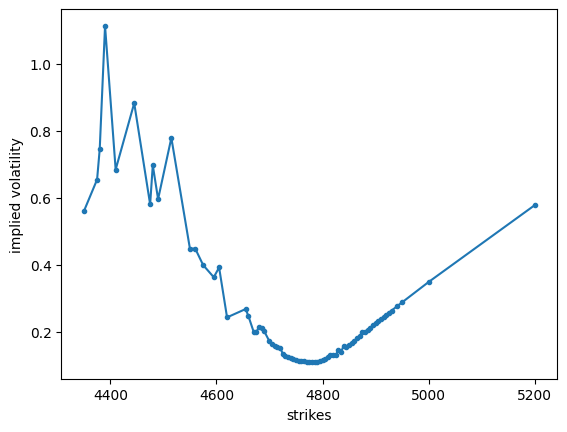

In [48]:
plt.plot(K[(call_iv!=0)], call_iv[(call_iv!=0)], '.-')
# plot for all call implied volatility is not 0
plt.xlabel('strikes')
plt.ylabel('implied volatility')
plt.show()

In [49]:
# OTM option IV
index1 = (K < S0)
index2 = (K > S0)
otm_iv = np.zeros(len(K))

otm_iv[index1] = put_iv[index1]
# for put options OTM is strike price <= current option price
otm_iv[index2] = call_iv[index2]
# > current option price for call options

K = K[otm_iv != 0]
otm_iv = otm_iv[otm_iv != 0]
# exclude all the OTM implied volatility = 0

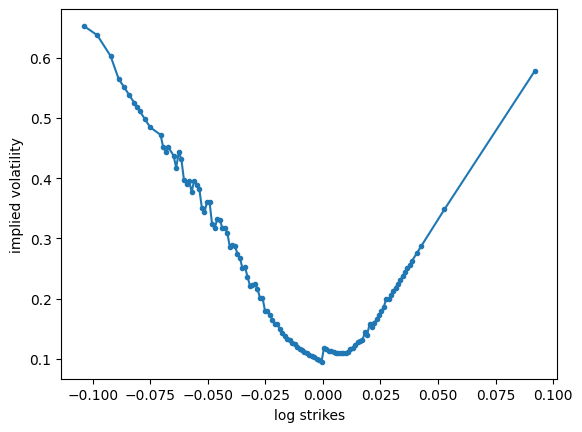

In [50]:
plt.plot(np.log(K/S0), otm_iv, '.-')
# plot for all call implied volatility is not 0
plt.xlabel('log strikes')
plt.ylabel('implied volatility')
plt.show()

In [51]:
import numpy as np
from scipy.optimize import least_squares

def implied_vol_smile(x, rho, sigma, y0):
    """
    Asymptotic IV expansion around x=0.
    x: log-moneyness (ln(K/S0)), shape (n,)
    rho, sigma, y0: parameters (floats)
    Returns model IVs, shape (n,)
    """
    z = sigma * x / y0
    sqrt_y0 = np.sqrt(y0)
    iv = sqrt_y0 * (1 + 0.25*rho*z + (1/24 - 5/48*rho**2)*z**2)
    return iv

def residuals(params, x, market_iv):
    rho, sigma, y0 = params
    model_iv = implied_vol_smile(x, rho, sigma, y0)
    return model_iv - market_iv

def calibrate_iv_smile(K, S0, market_iv, initial_guess=(0.0, 0.3, 0.04)):
    x = np.log(K / S0)
    abs_x = np.abs(x)
    res = least_squares(residuals, initial_guess, bounds=([-0.999, 1e-6, 1e-6], [0.999, 2.0, 2.0]), args=(x[abs_x<0.05], market_iv[abs_x<0.05]))
    rho, sigma, y0 = res.x
    return rho, sigma, y0, res

In [52]:
rho, sigma, y0, res = calibrate_iv_smile(K, S0, otm_iv)
np.mean(res.fun**2)

np.float64(8.982657763566265e-05)

In [53]:
import sys, os

sys.path.append(os.path.abspath("../"))

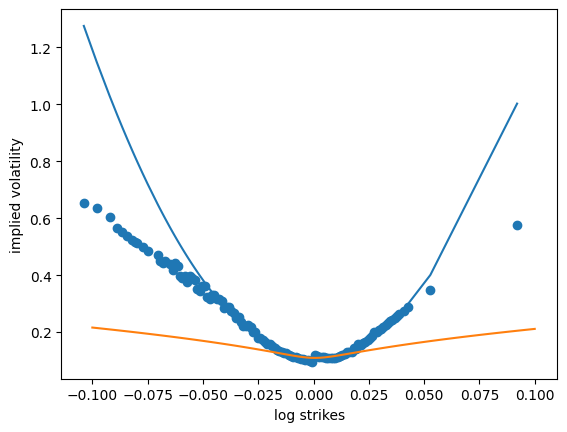

In [54]:
from src.models.iv_test import HestonSmallTimeIV
param = (-0.4, 0.1, 0.5)
model = HestonSmallTimeIV(param, None, None)

plt.scatter(np.log(K/S0), otm_iv)
plt.plot(np.log(K/S0), implied_vol_smile(np.log(K/S0), rho, sigma, y0), '-')
us = np.linspace(-0.1, 0.1, 100)
plt.plot(us, model.IV_curve([rho, sigma, np.sqrt(y0)], us))
# plot for all call implied volatility is not 0
plt.xlabel('log strikes')
plt.ylabel('implied volatility')
plt.show()

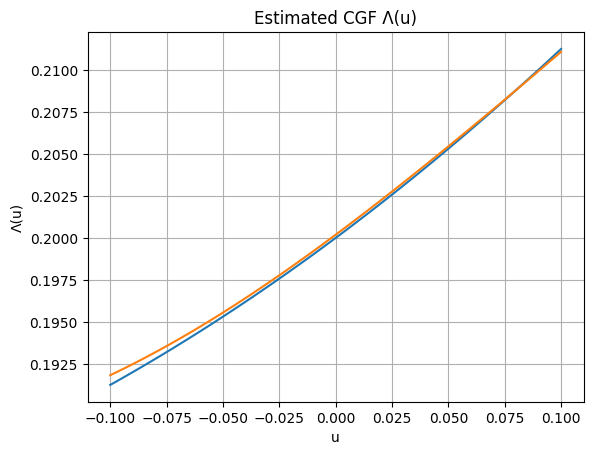

In [55]:
rho = 0.4
sigma = 0.2
y0 = 0.04
us = np.linspace(-0.1, 0.1, 100)

plt.plot(us, implied_vol_smile(us, rho, sigma, y0), '-')
plt.plot(us, model.IV_curve([0.4, 0.2, 0.2], us))
plt.title("Estimated CGF Λ(u)")
plt.xlabel("u")
plt.ylabel("Λ(u)")
plt.grid()
plt.show()

### Real Model Approach

In [70]:
def residuals(params, x, market_iv):
    rho, sigma, y0 = params
    model_iv = model.IV_curve([rho, sigma, y0], x)
    return model_iv - market_iv

def calibrate_iv_smile(K, S0, market_iv, initial_guess=(0.0, 0.3, 0.04)):
    x = np.log(K / S0)
    abs_x = np.abs(x)
    res = least_squares(residuals, initial_guess, bounds=([-0.999, 1e-6, 1e-6], [0.999, 100.0, 3.0]), args=(x, market_iv))
    rho, sigma, y0 = res.x
    return rho, sigma, y0, res

In [71]:
rho, sigma, y0, res = calibrate_iv_smile(K, S0, otm_iv)
np.mean(res.fun**2)

np.float64(0.0023377502360092165)

In [72]:
rho, sigma, y0

(np.float64(-0.33805388242230916),
 np.float64(13.712924595488474),
 np.float64(7.395803467040102e-06))

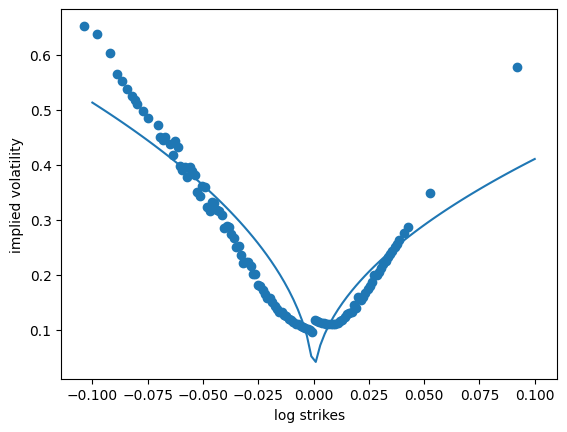

In [73]:
plt.scatter(np.log(K/S0), otm_iv)
# plt.plot(np.log(K/S0), implied_vol_smile(np.log(K/S0), rho, sigma, y0**2), '-')
us = np.linspace(-0.1, 0.1, 100)
plt.plot(us, model.IV_curve([rho, sigma, y0], us))
# plot for all call implied volatility is not 0
plt.xlabel('log strikes')
plt.ylabel('implied volatility')
plt.show()

In [17]:
nan = np.nan
i=1
S0 = df.loc[i,'S0']
K = np.array(eval(df.loc[i,'K']))
r = df.loc[i,'r']
T = df.loc[i,'DTE']/365
call = np.array(eval(df.loc[i,'c_last']))
put = np.array(eval(df.loc[i,'p_last']))

call = call[(K>=S0*0.9)&(K<=S0*1.1)]
put = put[(K>=S0*0.9)&(K<=S0*1.1)]
K = K[(K>=S0*0.9)&(K<=S0*1.1)]
put_iv = bisection_put_iv(S0, K, r, T, put)
call_iv = bisection_call_iv(S0, K, r, T, call)

In [31]:
def residuals(params, x, market_iv):
    rho, sigma, y0 = params
    model_iv = model.IV_curve([rho, sigma, y0], x)
    return model_iv - market_iv

def calibrate_iv_smile(K, S0, market_iv, initial_guess=(0.0, 0.2, 0.4)):
    x = np.log(K / S0)
    abs_x = np.abs(x)
    res = least_squares(residuals, initial_guess, bounds=([-0.999, 1e-6, 1e-6], [0.999, 500, 1]), args=(x, market_iv))
    rho, sigma, y0 = res.x
    return rho, sigma, y0, res

In [32]:
index2 = (K > S0)
K_call = np.zeros(len(K))
iv = np.zeros(len(K))
K_call[index2] = K[index2]
iv[index2] = call_iv[index2]

K_call = K_call[iv != 0]
iv = iv[iv != 0]
rho, sigma, y0, res = calibrate_iv_smile(K_call, S0, iv)
np.mean(res.fun**2)

np.float64(0.0015602820645025416)

In [33]:
rho, sigma, y0

(np.float64(-0.9989999999691398),
 np.float64(425.4134537314266),
 np.float64(0.3997203033625188))

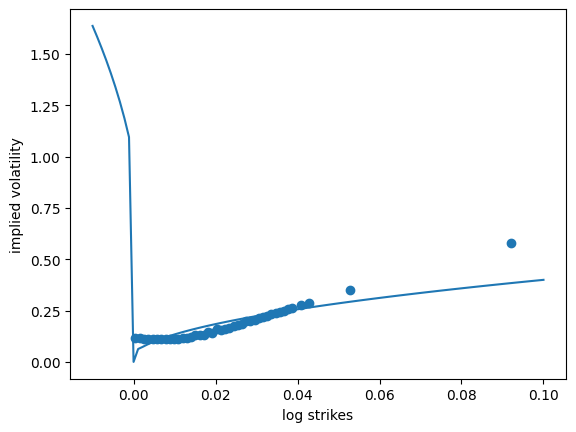

In [36]:
from src.models.iv_test import HestonSmallTimeIV
param = (-0.4, 0.1, 0.5)
model = HestonSmallTimeIV(param, None, None)

plt.scatter(np.log(K_call/S0), iv)
# plt.plot(np.log(K_call/S0), implied_vol_smile(np.log(K_call/S0), rho, sigma, np.sqrt(y0)), '-')
us = np.linspace(-0.01, 0.1, 100)
plt.plot(us, model.IV_curve([rho, sigma, y0], us))
# plot for all call implied volatility is not 0
plt.xlabel('log strikes')
plt.ylabel('implied volatility')
plt.show()

In [22]:
def residuals(params, x, market_iv):
    rho, sigma, y0 = params
    model_iv = implied_vol_smile(x, rho, sigma, y0)
    return model_iv - market_iv

def calibrate_iv_smile(K, S0, market_iv, initial_guess=(0.0, 0.3, 0.04)):
    x = np.log(K / S0)
    abs_x = np.abs(x)
    res = least_squares(residuals, initial_guess, bounds=([-0.999, 1e-6, 1e-6], [0.999, 5.0, 2.0]), args=(x[abs_x<0.05], market_iv[abs_x<0.05]))
    rho, sigma, y0 = res.x
    return rho, sigma, y0, res

In [23]:
rho, sigma, y0, res = calibrate_iv_smile(K_call, S0, iv)
np.mean(res.fun**2)

np.float64(3.4655871545234e-05)

In [24]:
rho, sigma, y0

(np.float64(0.003362439077632257),
 np.float64(1.7738530962516308),
 np.float64(0.011569465185905467))

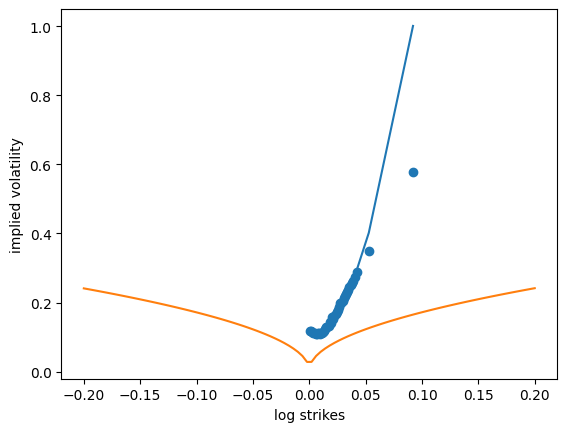

In [25]:
plt.scatter(np.log(K_call/S0), iv)
plt.plot(np.log(K_call/S0), implied_vol_smile(np.log(K_call/S0), rho, sigma, y0), '-')
us = np.linspace(-0.2, 0.2, 100)
plt.plot(us, model.IV_curve([rho, sigma, y0], us))
# plot for all call implied volatility is not 0
plt.xlabel('log strikes')
plt.ylabel('implied volatility')
plt.show()